# Data Visualization

In this notebook, we are making a few graphs that will help us understand the data.

This might be very useful for visualizing data for a specific city:
 - [Time Series Graphs & Eleven Stunning Ways You Can Use Them](https://plotlyblog.tumblr.com/post/117105992082/time-series-graphs-eleven-stunning-ways-you-can)
 - [UPDATE PLOTLY CHARTS WITH CRON JOBS AND PYTHON](https://moderndata.plot.ly/update-plotly-charts-with-cron-jobs-and-python/)
 - [SF and Montréal weather using plotly and wunderground APIs](http://nbviewer.jupyter.org/gist/jackparmer/899f1a945b1bf5376a05)
 
Here is a tutorial on how to visualize data for a specific city and how to make a weather map (e.g. for a specific state):
 - [Your own weather forecast in a Python notebook](https://developer.ibm.com/clouddataservices/2016/10/06/your-own-weather-forecast-in-a-python-notebook/)

In [1]:
from collections import OrderedDict
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

from plotly.graph_objs import *

## Read in the Data

Read in the data we collected in the `Data Collection and Cleaning` notebook.

In [2]:
dfs = []

for year in range(2013, 2018):
    months = range(1, 6) if year == 2017 else range(1, 13)
    
    for month in months:
        dfs.append(pd.read_csv("data/%d_%d.csv" % (year, month)))

data = pd.concat(dfs)
data

,year,month,day,dew_point_f_avg,dew_point_f_high,dew_point_f_low,events,humidity_%_avg,humidity_%_high,humidity_%_low,...,sea_level_press_in_low,temp_f_avg,temp_f_high,temp_f_low,visibility_mi_avg,visibility_mi_high,visibility_mi_low,wind_gust_mph_high,wind_mph_avg,wind_mph_high
0,2013,jan,1,37.0,40.0,33.0,,72.0,93.0,41.0,...,30.13,47.0,57.0,37.0,10.0,10.0,10.0,0.0,2.0,7.0
1,2013,jan,2,27.0,32.0,19.0,,42.0,76.0,17.0,...,30.07,54.0,68.0,39.0,10.0,10.0,10.0,0.0,4.0,10.0
2,2013,jan,3,33.0,42.0,26.0,,60.0,86.0,28.0,...,30.10,50.0,66.0,34.0,10.0,10.0,10.0,0.0,4.0,15.0
3,2013,jan,4,33.0,42.0,23.0,,65.0,89.0,21.0,...,30.19,49.0,64.0,34.0,10.0,10.0,10.0,0.0,3.0,9.0
4,2013,jan,5,44.0,49.0,30.0,Rain,88.0,100.0,60.0,...,30.17,46.0,57.0,34.0,7.0,10.0,2.0,0.0,3.0,10.0
5,2013,jan,6,45.0,48.0,39.0,Rain,85.0,100.0,69.0,...,30.09,50.0,54.0,46.0,9.0,10.0,2.0,34.0,5.0,14.0
6,2013,jan,7,40.0,44.0,38.0,,69.0,85.0,50.0,...,30.11,52.0,61.0,42.0,10.0,10.0,10.0,26.0,8.0,15.0
7,2013,jan,8,39.0,42.0,36.0,,58.0,82.0,33.0,...,30.06,57.0,70.0,44.0,10.0,10.0,10.0,17.0,5.0,13.0
8,2013,jan,9,46.0,52.0,39.0,Rain,84.0,100.0,55.0,...,30.04,50.0,59.0,42.0,9.0,10.0,2.0,26.0,3.0,17.0
9,2013,jan,10,36.0,43.0,31.0,Rain,67.0,82.0,54.0,...,30.04,45.0,53.0,37.0,10.0,10.0,10.0,32.0,11.0,25.0


## Matplotlib

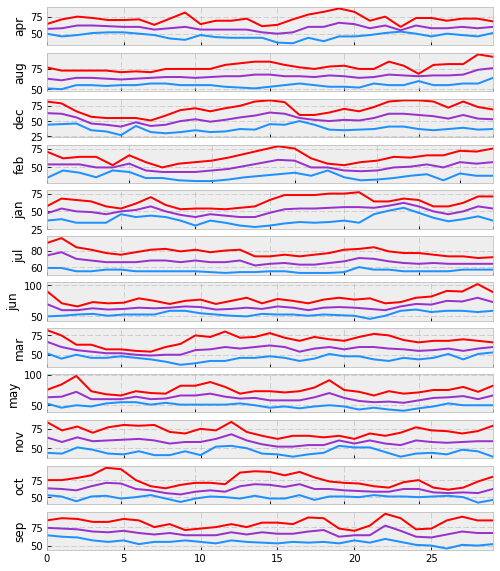

In [3]:
data_2013 = data[data["year"] == 2013]
count = 0

plt.style.use('bmh')
 
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(8, 10))

# temp for 2013
for name, group in data_2013.groupby(data_2013["month"]):
    group['temp_f_low'].plot(ax=axes[count], color='dodgerblue',sharex=True)
    group['temp_f_avg'].plot(ax=axes[count], kind='line',color='darkorchid', sharex=True)
    group['temp_f_high'].plot(ax=axes[count], kind='line',color='red', sharex=True)
    axes[count].set_ylabel(name)
    
    count += 1

## Plotly

In [4]:
data_2013 = data[data["year"] == 2013]
data_2013 = data_2013.groupby(data_2013["month"])

### Traces

In order to plot multiple variables in on the same graph we have to create a Scatter object (a trace) for each variable.

Here we split the temperature data into multiple traces - low, average and high.

In [5]:
traces = []

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month_names = {'jan': 'January', 'feb': 'February', 'mar': 'March', 'apr': 'April', 'may': 'May', 'jun': 'June', 'jul': 'July', 'aug': 'August', 'sep': 'September', 'oct': 'October', 'nov': 'November', 'dec': 'December'}

for key in months:
    traces.append(
        Scatter({
            'x': data_2013.get_group(key)['day'],
            'y': data_2013.get_group(key)['temp_f_low'],
            'mode': 'lines',
            'name': 'Low'
        }))
    traces.append(
        Scatter({
            'x': data_2013.get_group(key)['day'],
            'y': data_2013.get_group(key)['temp_f_avg'],
            'mode': 'lines',
            'name': 'Average'
        }))
    traces.append(
        Scatter({
            'x': data_2013.get_group(key)['day'],
            'y': data_2013.get_group(key)['temp_f_high'],
            'mode': 'lines',
            'name': 'High'
        }))

### Buttons

Instead of making many plots showing pretty much the same data, we will create an interactive plot.

Here we create the buttons which will show the temperature data for each month of the year.

In [6]:
buttons = []

for i, month in enumerate(months):
    vals = [False] * len(months) * 3
    
    vals[i * 3] = True
    vals[i * 3 + 1] = True
    vals[i * 3 + 2] = True
    
    buttons.append({
        'args': ['visible', vals],
        'label': month_names[month],
        'method': 'restyle'
    })

### Layout

Now that we formatter the data and the buttons correctly, we have to create a layout of the plot.

In [7]:
interactive_layout = Layout({
        'title': 'Monthly Temperatures for San Luis Obispo, 2013',
        'xaxis': {'title': 'Day of the Month'},
        'yaxis': {'title': 'Temperature [&deg;F]'},
        'updatemenus': [{
                'x': -0.15,
                'y': 1,
                'yanchor': 'top',
                'buttons': buttons
            }]
    })

### Create a new figure and plot it.

NOTE: The initial view shows the data for all months. In order to see the data for each month individually, use the dropdown on the left hand side.

In [8]:
interactive_fig = Figure(data=traces, layout=interactive_layout)
py.iplot(interactive_fig)